In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r'C:\Users\NOMI\Downloads\tweets.csv', encoding='ISO-8859-1',header=None)
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [17]:
df.columns = ['Index', 'user_id', 'Timing', 'username', 'tweet','reactions']
print(df.head())

   Index     user_id                        Timing  username            tweet  \
0      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                           reactions  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [18]:
df.head()

,Index,user_id,Timing,username,tweet,reactions
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [19]:
#Data cleaning:
print(df.isnull().sum()) #checking missing values in data set

Index        0
user_id      0
Timing       0
username     0
tweet        0
reactions    0
dtype: int64


In [20]:
#If there is miising value or any other issue then i can use below quries:

# Drop rows with any missing values:
#df = df.dropna()
# Fill missing values with an empty string:
#df = df.fillna('')
# Remove duplicate rows:
#df = df.drop_duplicates()

In [21]:
# Calculate the length of each tweet
df['tweet_length'] = df['tweet'].apply(len)
print(df[['tweet', 'tweet_length']].head())

             tweet  tweet_length
0  _TheSpecialOne_            15
1    scotthamilton            13
2         mattycus             8
3          ElleCTF             7
4           Karoli             6


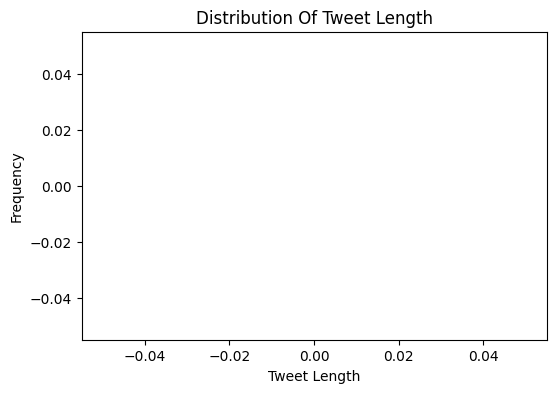

In [22]:
#Visulization of tweets using matplotlib:
plt.figure(figsize=(6,4))
plt.hist(df['tweet_length'],bins=[50],color='skyblue',edgecolor='black')
plt.title('Distribution Of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()



In [23]:
# Convert all tweets to lowercase
df['tweet'] = df['tweet'].str.lower()
# Split tweets into words
df['words'] = df['tweet'].str.split()
print(df[['tweet', 'words']].head())

             tweet              words
0  _thespecialone_  [_thespecialone_]
1    scotthamilton    [scotthamilton]
2         mattycus         [mattycus]
3          ellectf          [ellectf]
4           karoli           [karoli]


In [24]:
from collections import Counter
#all_words=sum(df['words'],[]) # Combine all words into one list
#word_counts = Counter(all_words)  #Count the frequency of each word
#print(word_counts.most_common(10)) # Display the 10 most common words

# Initialize an empty Counter object
word_counts = Counter()

# Iterate through each list of words in the dataframe
for words_list in df['words']:
    word_counts.update(words_list)

# Display the 10 most common words
print(word_counts.most_common(10))

[('lost_dog', 549), ('webwoke', 345), ('tweetpet', 310), ('sallytheshizzle', 281), ('violetscruk', 279), ('mcraddictal', 276), ('tsarnick', 248), ('what_bugs_u', 246), ('karen230683', 238), ('darkpiano', 236)]


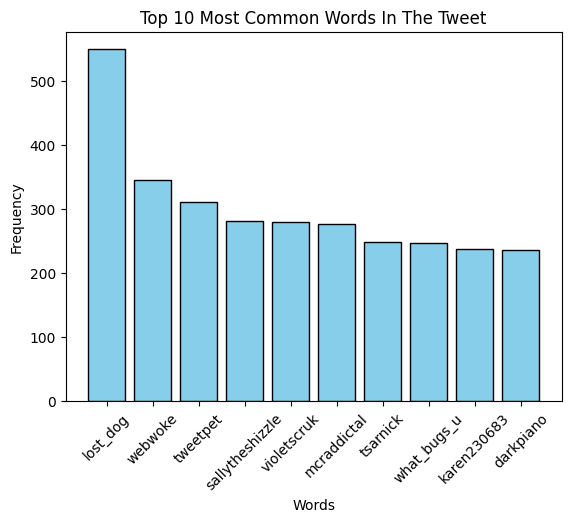

In [25]:
common_words= word_counts.most_common(10)
words,count=zip(*common_words)
plt.bar(words,count,color='skyblue',edgecolor='black')
plt.title('Top 10 Most Common Words In The Tweet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [26]:
# Define Lists of Positive and Negative Words / sentimental anlysis
positive_words = ['good', 'great', 'happy', 'love', 'excellent', 'fortunate', 'correct', 'superior']
negative_words = ['bad', 'terrible', 'sad', 'hate', 'poor', 'unfortunate', 'wrong', 'inferior']
# Count the number of positive and negative words in each tweet
df['positive_count'] = df['words'].apply(lambda x: sum(1 for word in x if word in positive_words))
df['negative_count'] = df['words'].apply(lambda x: sum(1 for word in x if word in negative_words))
# Determine the sentiment of each tweet
df['sentiment'] = df.apply(lambda row: 'positive' if row['positive_count'] > row['negative_count']
                           else ('negative' if row['negative_count'] > row['positive_count']
                           else 'neutral'), axis=1)

# Display a sample of the DataFrame with the sentiment labels
print(df[[ 'positive_count', 'negative_count', 'sentiment']].head(10))


   positive_count  negative_count sentiment
0               0               0   neutral
1               0               0   neutral
2               0               0   neutral
3               0               0   neutral
4               0               0   neutral
5               0               0   neutral
6               0               0   neutral
7               0               0   neutral
8               0               0   neutral
9               0               0   neutral


In [27]:
# Count the number of positive, negative, and neutral tweets
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
neutral    1600000
Name: count, dtype: int64


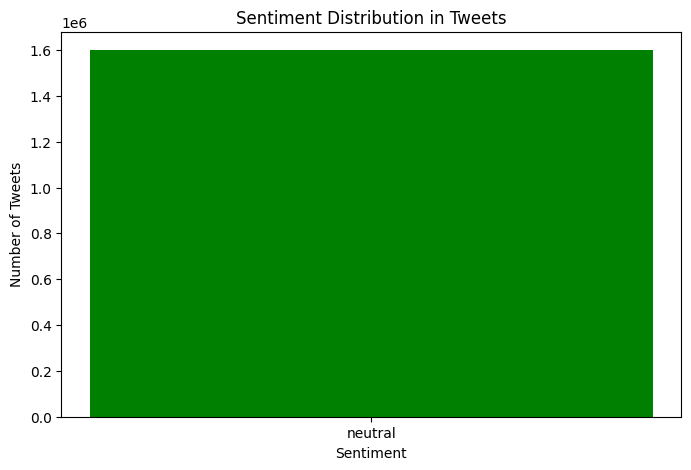

In [28]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 5))  
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
